In [1]:
#!pip install nb_black
#%reload_ext nb_black

In [2]:
import sqlite3

#!pip install category_encoders
import pandas as pd
from sqlite3 import OperationalError
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from category_encoders import LeaveOneOutEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
import math

# import plotly.express as px
from sklearn.metrics import mean_absolute_error

ModuleNotFoundError: No module named 'category_encoders'

In [3]:
Data = pd.read_csv("Cardiovascular.csv")
print(Data.head())

  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       299312 non-null  object 
 2   Exercise                      299312 non-null  object 
 3   Heart_Disease                 299312 non-null  object 
 4   Skin_Cancer                   299312 non-null  object 
 5   Other_Cancer                  299312 non-null  object 
 6   Depression                    299312 non-null  object 
 7   Diabetes                      299312 non-null  object 
 8   Arthritis                     299312 non-null  object 
 9   Sex                           299312 non-null  object 
 10  Age_Category                  299312 non-null  object 
 11  Height_(cm)                   299312 non-null  float64
 12  Weight_(kg)                   299312 non-nul

In [5]:
test3 = Data.isna().sum() / len(Data)

In [6]:
Drop = list(test3[test3 > 0.5].index)

In [7]:
Drop

[]

In [8]:
Data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       299312 non-null  object 
 2   Exercise                      299312 non-null  object 
 3   Heart_Disease                 299312 non-null  object 
 4   Skin_Cancer                   299312 non-null  object 
 5   Other_Cancer                  299312 non-null  object 
 6   Depression                    299312 non-null  object 
 7   Diabetes                      299312 non-null  object 
 8   Arthritis                     299312 non-null  object 
 9   Sex                           299312 non-null  object 
 10  Age_Category                  299312 non-null  object 
 11  Height_(cm)                   299312 non-null  float64
 12  Weight_(kg)                   299312 non-nul

In [10]:
Data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Height_(cm),299312.0,170.72,10.65,91.00,163.00,170.00,178.00,241.00
Weight_(kg),299312.0,83.49,21.28,24.95,68.04,81.65,95.25,293.02
BMI,299312.0,28.55,6.48,12.02,24.21,27.44,31.71,99.33
Alcohol_Consumption,299312.0,5.13,8.22,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,299312.0,29.86,24.89,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,299312.0,15.11,14.92,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,299312.0,6.31,8.59,0.00,2.00,4.00,8.00,128.00


In [11]:
Data["Heart_Disease"].value_counts()

No     275231
Yes     24081
Name: Heart_Disease, dtype: int64

In [14]:
Data = Data[Data["Heart_Disease"] != "M"]

In [15]:
severity_map = {
    "Yes": 1,
    "No": 2,
}
Data["Heart_Disease"] = Data["Heart_Disease"].replace(severity_map)

In [16]:
Data["Heart_Disease"].fillna("NA").value_counts()

2.0    275231
1.0     24081
NA       9542
Name: Heart_Disease, dtype: int64

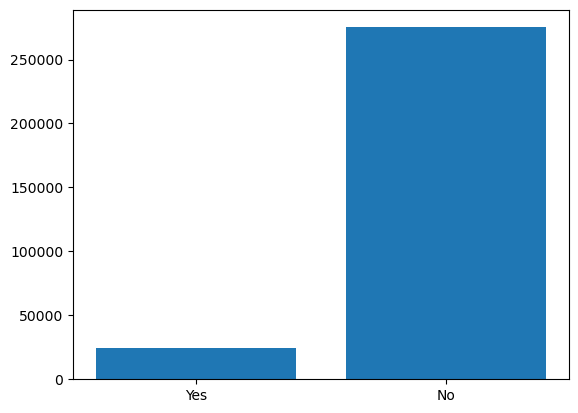

In [17]:
x=[1, 2]
y=[24081, 275231]
plt.bar(x, y)
bar_name=('Yes', 'No')
plt.xticks(x, bar_name)
plt.show()

In [18]:
Data[Data["Heart_Disease"].isna()].head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
26,"Fair,Within the past year,No,No,No,No,No,""No, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,"Very Good,Within the past year,No,No,No,No,No,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,"Poor,Within the past year,Yes,No,Yes,No,Yes,""N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,"Very Good,Within the past 2 years,No,No,Yes,No...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,"Fair,Within the past year,Yes,No,No,No,No,""No,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# pd.crosstab(
#     Data["Heart_Disase"].fillna("sober"), Data["Yes"], dropna=False
# )

In [20]:
#Data["party_drug_physical"] = Data["party_drug_physical"].fillna("sober")

In [21]:
checkup_map = {
    "Within the past year": 5,
    "Whitin the past 2 years": 4,
    "Within the past 5 years":3,
    "5 or more years ago":2,
    "Never":1
}
Data["Checkup"] = Data["Checkup"].replace(checkup_map)

In [22]:
Data["Checkup"].fillna("NA").value_counts()

5                          231520
Within the past 2 years     36167
3                           17020
2                           13215
NA                           9542
1                            1390
Name: Checkup, dtype: int64

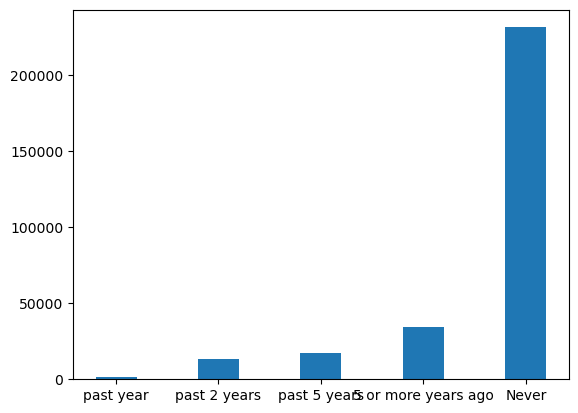

In [23]:
x=[0, 2, 4, 6, 8]
y=[1390, 13215, 17020, 34167, 231520]
plt.bar(x, y)
bar_name=('past year', 'past 2 years', 'past 5 years', '5 or more years ago', 'Never')
plt.xticks(x, bar_name)
plt.show()
#add a title for chart & x and y label

In [24]:
Data["Checkup"].value_counts()

5                          231520
Within the past 2 years     36167
3                           17020
2                           13215
1                            1390
Name: Checkup, dtype: int64

In [25]:
Data["Age_Category"].value_counts()

65-69    32321
60-64    31268
70-74    30086
55-59    27134
50-54    24259
80+      21542
40-44    20857
45-49    20295
75-79    20004
35-39    19913
18-24    18474
30-34    17963
25-29    15196
Name: Age_Category, dtype: int64

In [26]:
Data["General_Health"].value_counts()

Very Good                                                                                                                                                107449
Good                                                                                                                                                      91775
Excellent                                                                                                                                                 55002
Fair                                                                                                                                                      34228
Poor                                                                                                                                                      10858
                                                                                                                                                          ...  
Poor,Within the past year,Yes,No,Yes,No,

In [27]:
Data["General_Health"] = Data["General_Health"].replace(
    {1: "Very Good", 2: "Good", 3: "Excellent", 4: "Fair", 5: "Poor"}
)

In [28]:
Data["General_Health"].unique()

array(['Poor', 'Very Good', 'Good', ...,
       'Fair,Within the past 2 years,Yes,No,No,No,No,"No, pre-diabetes or borderline diabetes",No,Female,25-29,170.0,117.48,40.56,No,4.0,6.0,2.0,5.0',
       'Very Good,Within the past year,Yes,No,No,No,No,"Yes, but female told only during pregnancy",No,Female,40-44,163.0,72.57,27.46,No,0.0,12.0,16.0,3.0',
       'Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0'],
      dtype=object)

In [29]:
# Feature selections 
#sns.boxplot(Data["Genaral_Health"], Data["Heart_Disease"])
sns.boxplot(Data["Exercise"], Data["Alcohol_Consumption"])

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

In [30]:
# sns.boxplot(Data["beat_number"], Data["collision_severity"])

In [31]:
Data = LeaveOneOutEncoder().fit_transform(Data, Data["Heart_Disease"])

NameError: name 'LeaveOneOutEncoder' is not defined

In [56]:
Data["party_type"]

KeyError: 'party_type'

In [57]:
Data["Age_Category"].value_counts()

65-69    32321
60-64    31268
70-74    30086
55-59    27134
50-54    24259
80+      21542
40-44    20857
45-49    20295
75-79    20004
35-39    19913
18-24    18474
30-34    17963
25-29    15196
Name: Age_Category, dtype: int64

In [58]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       299312 non-null  object 
 2   Exercise                      299312 non-null  object 
 3   Heart_Disease                 299312 non-null  float64
 4   Skin_Cancer                   299312 non-null  object 
 5   Other_Cancer                  299312 non-null  object 
 6   Depression                    299312 non-null  object 
 7   Diabetes                      299312 non-null  object 
 8   Arthritis                     299312 non-null  object 
 9   Sex                           299312 non-null  object 
 10  Age_Category                  299312 non-null  object 
 11  Height_(cm)                   299312 non-null  float64
 12  Weight_(kg)                   299312 non-nul

C:\Users\MaryamMastZohoori\AppData\Local\Temp\ipykernel_18604\2890797613.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  HealthCor = Data.corr()[["Heart_Disease"]].sort_values("Heart_Disease")


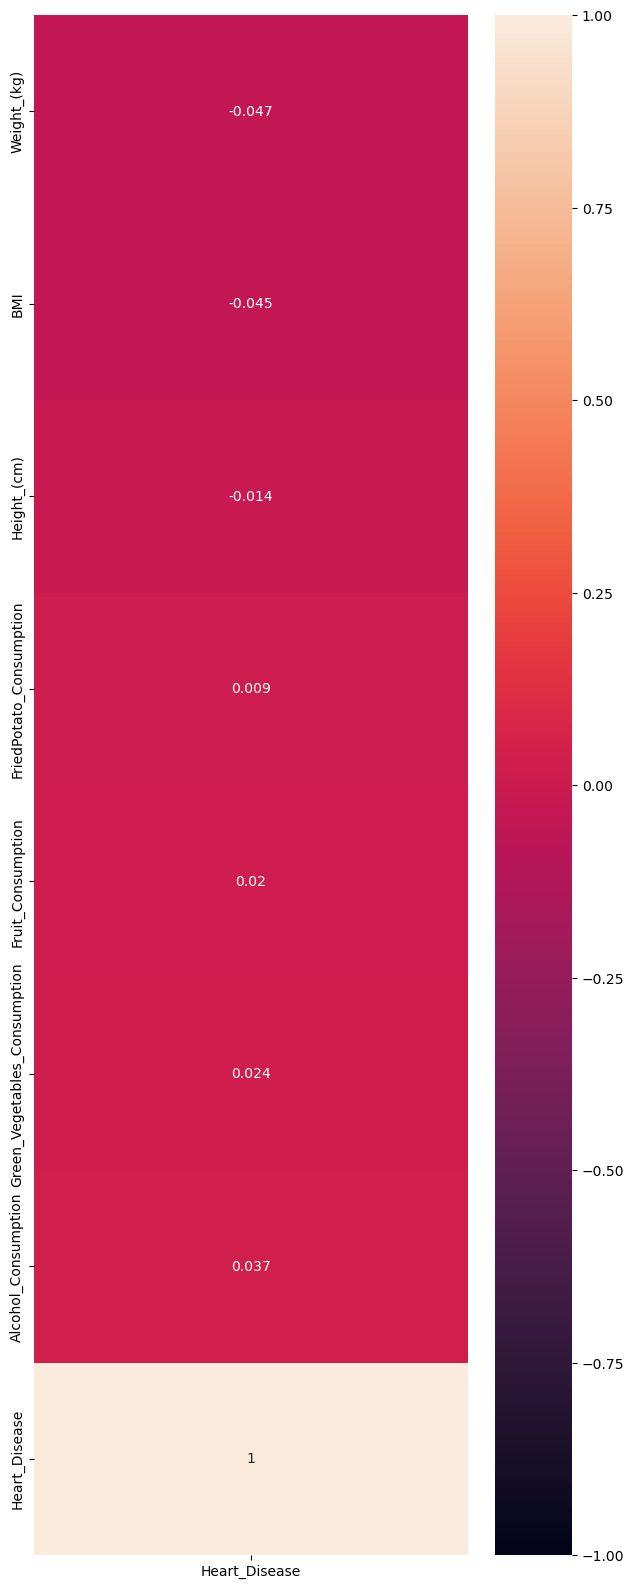

In [155]:
HealthCor = Data.corr()[["Heart_Disease"]].sort_values("Heart_Disease")
plt.figure(figsize=(7, 20))
sns.heatmap(
    HealthCor,
    vmin=-1,
    annot=True,
)
plt.show()

In [156]:
HealthCor

,Heart_Disease
Weight_(kg),-0.046630
BMI,-0.044591
Height_(cm),-0.014117
FriedPotato_Consumption,0.009006
Fruit_Consumption,0.019834
Green_Vegetables_Consumption,0.024078
Alcohol_Consumption,0.037377
Heart_Disease,1.000000


In [117]:
df1 = Data[HealthCor.index]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308854 entries, 0 to 308853
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   BMI                           299312 non-null  float64
 1   Weight_(kg)                   299312 non-null  float64
 2   Fruit_Consumption             299312 non-null  float64
 3   FriedPotato_Consumption       299312 non-null  float64
 4   Heart_Disease                 299312 non-null  float64
 5   Green_Vegetables_Consumption  299312 non-null  float64
 6   Height_(cm)                   299312 non-null  float64
 7   Alcohol_Consumption           299312 non-null  float64
dtypes: float64(8)
memory usage: 21.2 MB


<function matplotlib.pyplot.show(close=None, block=None)>

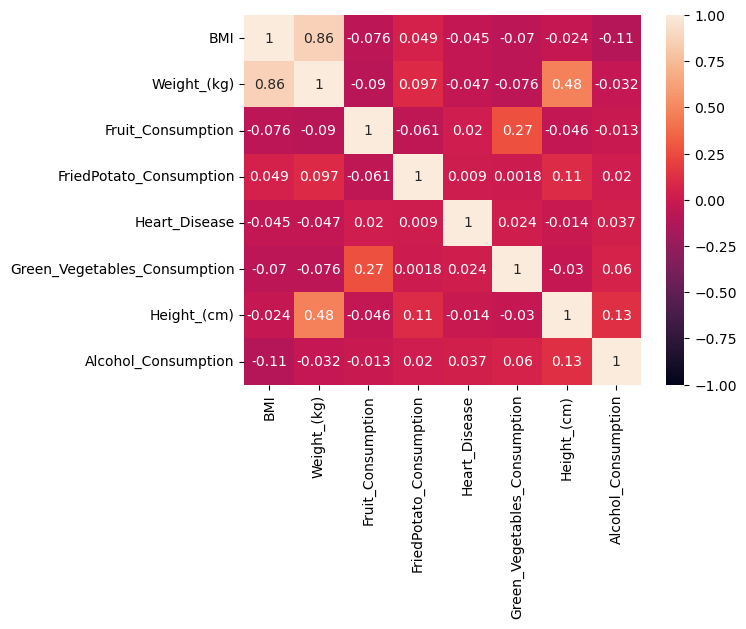

In [118]:
sns.heatmap(df1.corr(), vmin=-1, annot=True)
plt.show

1) Random Forest

Sample 3 rows from X_train.

In [69]:
df1 = df1.dropna()

In [70]:
df1

,Weight_(kg),BMI,Height_(cm),FriedPotato_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Alcohol_Consumption,Heart_Disease
0,32.66,14.54,150.0,12.0,30.0,16.0,0.0,3.0
1,77.11,28.29,165.0,4.0,30.0,0.0,0.0,2.0
2,88.45,33.47,163.0,16.0,12.0,3.0,4.0,3.0
3,93.44,28.73,180.0,8.0,30.0,30.0,0.0,2.0
4,88.45,24.37,191.0,0.0,8.0,4.0,0.0,3.0
...,...,...,...,...,...,...,...,...
308848,58.97,20.98,168.0,0.0,16.0,12.0,0.0,3.0
308849,81.65,29.05,168.0,0.0,30.0,8.0,4.0,3.0
308850,69.85,21.48,180.0,4.0,15.0,60.0,8.0,3.0
308852,79.38,23.73,183.0,0.0,30.0,12.0,3.0,3.0


In [71]:
X = df1.drop(
    columns="Heart_Disease"
)  # x is all columns except "collision_severity"

y = df1["Heart_Disease"]  # y is "collision_severity"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
prinrt(X)
print(y)

Fit a random forest classifier to the data.

In [72]:
# Bagging + Rand features done for us
model = RandomForestClassifier(n_estimators=30, max_depth=3)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [73]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 0.9191268286775054
test_score: 0.9212201192723385


In [74]:
y_pred = model.predict(X_test)
MeanAbsError = np.mean(np.abs((y_pred - y_test)))
MeanAbsError

0.0787798807276615

In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[    0  4716]
 [    0 55147]]


In [76]:
MAPE = np.mean(np.abs(np.divide((y_pred - y_test), y_test)))
MAPE

0.03938994036383075

Importance for intepretabilit

In [77]:
importance_df = pd.DataFrame(
    {"feat": X_train.columns, "importance": model.feature_importances_}
)
importance_df.sort_values("importance", ascending=False)

,feat,importance
6,Alcohol_Consumption,0.581007
0,Weight_(kg),0.154178
1,BMI,0.135280
3,FriedPotato_Consumption,0.045874
2,Height_(cm),0.037970
4,Fruit_Consumption,0.029135
5,Green_Vegetables_Consumption,0.016556


Importance for feature selection

In [81]:
selector = SelectFromModel(RandomForestClassifier(), max_features=2)
selector.fit(X_train, y_train)
X_train.loc[:, selector.get_support()].head()

,BMI,Green_Vegetables_Consumption
163248,43.24,12.0
83261,35.87,20.0
194563,29.95,8.0
232054,27.62,0.0
271380,18.16,4.0


Linear Regression

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
y_train.mean()

2.9191268286775056

In [84]:
model.score(X_train, y_train)  #%11 better than just average

0.004124365982957401

In [85]:
model.score(X_test, y_test)

0.004074652296872094

In [86]:
print(model.intercept_)
print(model.coef_)

2.9367352392748036
[-6.02405908e-04  9.99325483e-06  9.29160990e-05  4.17512319e-04
  1.40226850e-04  2.55747431e-04  1.13909670e-03]


In [87]:
y_pred = model.predict(X_test)

In [88]:
pred_df = X_test.copy()
pred_df["y_true"] = y_test
pred_df["y_pred"] = y_pred
pred_df.head()

,Weight_(kg),BMI,Height_(cm),FriedPotato_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Alcohol_Consumption,y_true,y_pred
25628,73.03,21.84,183.0,16.0,16.0,12.0,2.0,3.0,2.924234
251166,104.33,30.34,185.0,4.0,28.0,4.0,1.0,3.0,2.899137
21594,79.38,28.25,168.0,4.0,60.0,60.0,0.0,3.0,2.930237
51186,48.99,21.09,152.0,2.0,16.0,24.0,0.0,3.0,2.930774
262291,88.45,27.98,178.0,2.0,30.0,30.0,0.0,3.0,2.912985


In [89]:
mean_absolute_error(y_test, y_pred)

0.14632392188165827